![image](screenshot.png)

# Time-series Forecasting

## Description
The data consists of 52,416 observations of energy consumption on a 10-minute window. Every observation is described by the following feature columns.

Your task is to **aggregate the observations on an interval of 2 hours**. For this time interval, using the values of the **4 previous time intervals**, forecast the target value one step in the future. Choose which features you are going to use.

**You must train a Boosting model for the task. Choose the model based on the number, and type of features available.**



Features:

* Date: Time window of ten minutes.
* Temperature: Weather Temperature.
* Humidity: Weather Humidity.
* WindSpeed: Wind Speed.
* GeneralDiffuseFlows: “Diffuse flow” is a catchall term to describe low-temperature (< 0.2° to ~ 100°C) fluids that slowly discharge through sulfide mounds, fractured lava flows, and assemblages of bacterial mats and macrofauna.
* DiffuseFlows

Target:

SolarPower

## Dataset links:
* [DS1](https://drive.google.com/file/d/1-Pcpb1xWpKc8Cgs-P7xqBFHw2NM0dBsA/view?usp=sharing)
* [DS2](https://drive.google.com/file/d/1-Pul07w6LXpm-uo99qbNc86FHhwl4yQD/view?usp=sharing)

## Read the datasets

In [155]:
import pandas as pd
from numpy.ma.core import count
from pandas import isnull

features_df = pd.read_csv("./data/power_consumption_g3_feat.csv")
target_df = pd.read_csv("./data/power_consumption_g3.csv")

In [156]:
features_df

,Date,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,2017-03-01 16:40:00,21.33,55.91,0.080,387.400,427.300
1,2017-07-27 06:30:00,23.10,48.58,4.908,10.450,8.630
2,2017-10-11 19:00:00,23.10,59.82,0.084,0.446,0.322
3,2017-02-10 06:50:00,12.25,80.80,4.916,0.051,0.111
4,2017-03-06 16:00:00,15.62,59.38,0.075,533.400,579.900
...,...,...,...,...,...,...
52411,2017-05-14 02:20:00,23.58,43.10,0.075,0.110,0.122
52412,2017-11-17 19:20:00,17.30,76.50,0.075,0.040,0.148
52413,2017-03-21 12:10:00,17.90,50.28,0.081,837.000,296.700
52414,2017-07-28 05:10:00,25.23,61.32,4.907,0.091,0.119


In [157]:
target_df

,Date,SolarPower
0,2017-06-22 11:50:00,35818.80795
1,2017-04-24 22:50:00,34628.20237
2,2017-11-05 09:00:00,22781.53846
3,2017-10-19 23:20:00,31925.77681
4,2017-03-25 17:10:00,30246.12766
...,...,...
52411,2017-02-08 16:10:00,31808.13559
52412,2017-07-04 17:40:00,35816.61130
52413,2017-07-02 17:00:00,31185.64784
52414,2017-08-02 16:40:00,39463.35183


In [158]:
features_df["Date"] = pd.to_datetime(features_df["Date"])
features_df.set_index(keys=["Date"], inplace=True)
features_df.sort_index(inplace=True)

In [159]:
features_df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
Date,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085
...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074


In [160]:
target_df["Date"] = pd.to_datetime(target_df["Date"])
target_df.set_index(keys=["Date"], inplace=True)
target_df.sort_index(inplace=True)

## Merge the datasets (and pre-processing if needed)


In [161]:
def join_dataframes_by_index(df1, df2, how='inner'):
    return pd.merge(df1, df2, left_index=True, right_index=True, how=how)

In [162]:
df = join_dataframes_by_index(features_df,target_df)

In [163]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620
...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096,31160.45627
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452


In [164]:
df.isnull().sum()

Temperature            559
Humidity               499
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
SolarPower               0
dtype: int64

In [165]:
def fill_missing_values(df:pd.DataFrame, column_name:str)->pd.DataFrame:

    df_copy = df.copy()
    first_valid_idx = df_copy[column_name].first_valid_index()
    last_valid_idx = df_copy[column_name].last_valid_index()

    df_copy.loc[:first_valid_idx, column_name] = df_copy.loc[:first_valid_idx, column_name].bfill()
    df_copy.loc[last_valid_idx:, column_name] = df_copy.loc[last_valid_idx:, column_name].ffill()
    df_copy[column_name] = df_copy[column_name].interpolate(method='linear')
    return df_copy

In [166]:
for col in list(df.columns):
    df = fill_missing_values(df,col)

In [167]:
df.isnull().sum()

Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
SolarPower             0
dtype: int64

## Group the datasets into time intervals of 2 hours

In [168]:
df = df.groupby(pd.Grouper(freq="2h")).mean()


In [169]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937
2017-01-01 02:00:00,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607
2017-01-01 04:00:00,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987
2017-01-01 06:00:00,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
2017-01-01 08:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872
...,...,...,...,...,...,...
2017-12-30 14:00:00,14.513333,39.675417,0.077667,409.650000,42.163333,29293.789606
2017-12-30 16:00:00,14.015000,43.082500,0.077500,153.905000,152.368333,31262.864386
2017-12-30 18:00:00,10.112500,60.359583,0.075583,1.618917,1.676750,37721.673005


In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_line_for_columns(df:pd.DataFrame, columns:list[str]):
    for col in columns:
        plt.figure(figsize=(5, 3))
        sns.lineplot(df[col])
        plt.show()


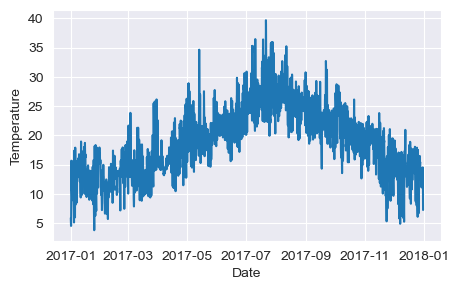

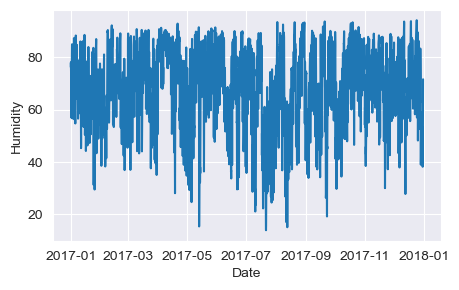

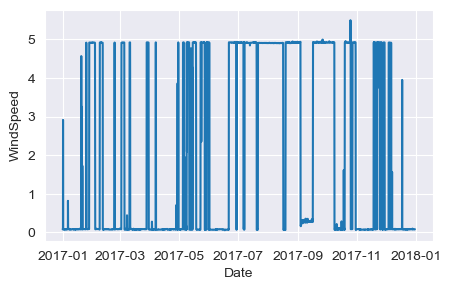

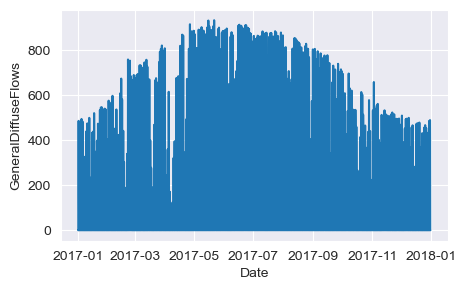

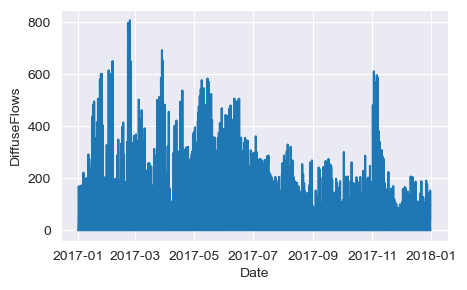

In [171]:
plot_line_for_columns(df.drop(columns=["SolarPower"]),list(df.drop(columns=["SolarPower"]).columns))

<Axes: >

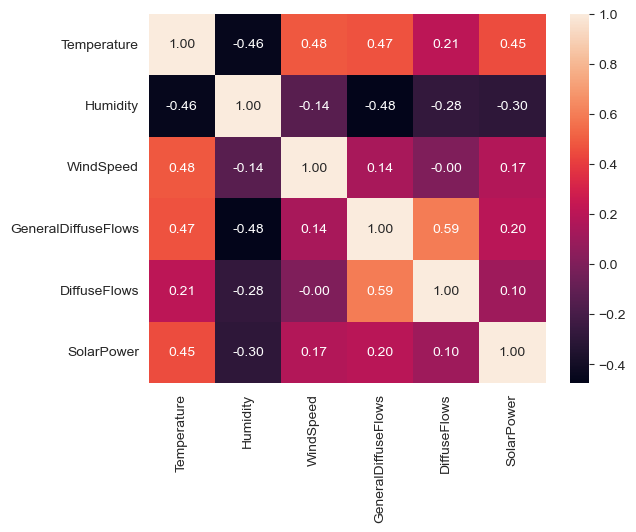

In [172]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

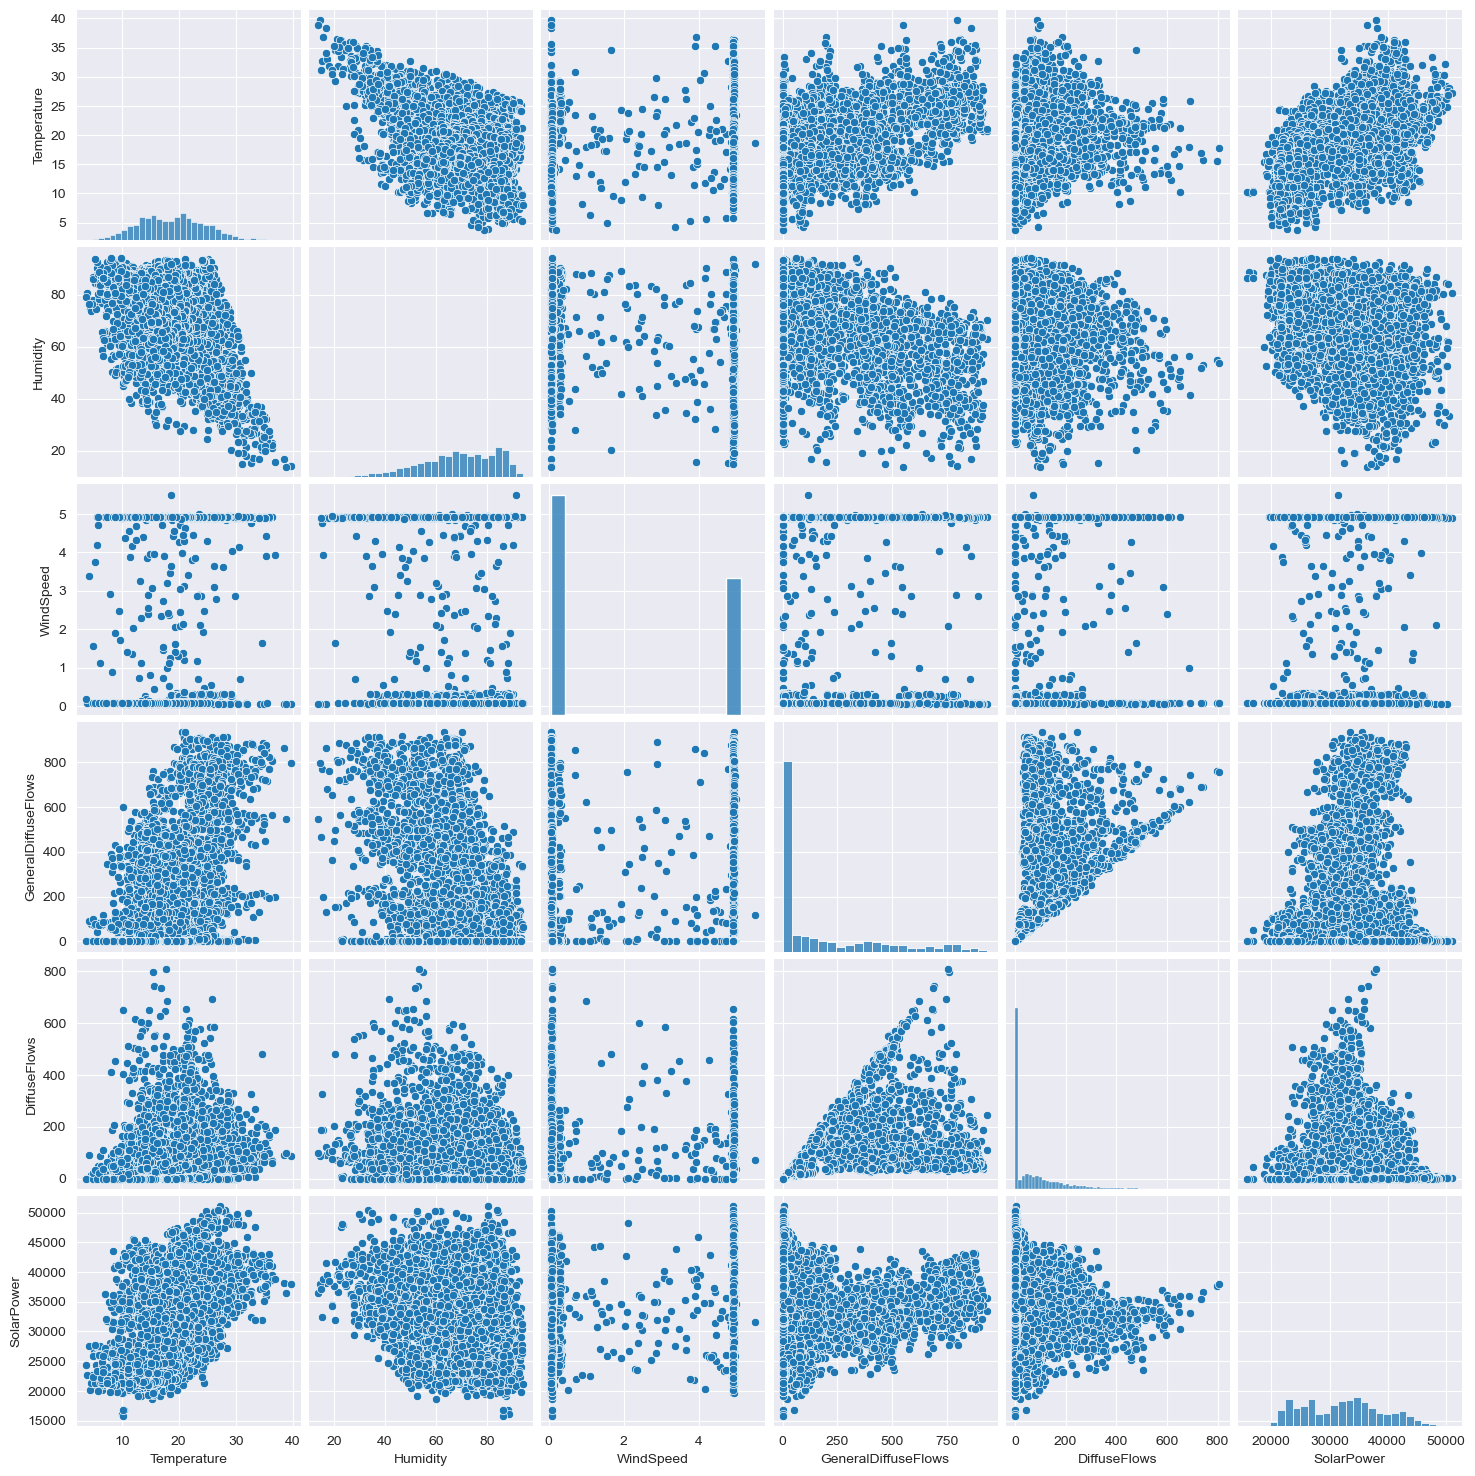

In [173]:
sns.pairplot(df)


## Create lags

In [174]:
lag = 4

In [175]:
def shift(df:pd.DataFrame,columns:list[str],n:int) -> pd.DataFrame:
    df_copy = df.copy(deep=True)
    lags = range(n, 0, -1)
    for lag in lags:
        for column in columns:
            df_copy[f"{column}_{lag}"] = df_copy[column].shift(lag)
    return df_copy

In [176]:
target = "SolarPower"
features = list(df.drop(columns=[target],axis=1).columns)
all_before_lag = list(df.columns)

In [177]:
print(target)
print(features)

SolarPower
['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']


In [178]:
df = shift(df,list(df.columns),lag)

In [179]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower,Temperature_4,Humidity_4,WindSpeed_4,GeneralDiffuseFlows_4,...,WindSpeed_2,GeneralDiffuseFlows_2,DiffuseFlows_2,SolarPower_2,Temperature_1,Humidity_1,WindSpeed_1,GeneralDiffuseFlows_1,DiffuseFlows_1,SolarPower_1
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937
2017-01-01 04:00:00,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987,NaN,NaN,NaN,NaN,...,0.081917,0.060167,0.105667,26927.594937,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607
2017-01-01 06:00:00,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545,NaN,NaN,NaN,NaN,...,0.082583,0.061417,0.135083,21447.088607,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987
2017-01-01 08:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872,5.866833,76.300000,0.081917,0.060167,...,0.081667,0.061917,0.120833,20641.518987,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 14:00:00,14.513333,39.675417,0.077667,409.650000,42.163333,29293.789606,11.221667,48.974583,0.078417,0.062917,...,0.077000,353.441667,36.275833,29649.683142,14.399167,38.129167,0.077667,489.841667,38.455000,30490.240812
2017-12-30 16:00:00,14.015000,43.082500,0.077500,153.905000,152.368333,31262.864386,11.082500,48.224167,0.078083,76.933417,...,0.077667,489.841667,38.455000,30490.240812,14.513333,39.675417,0.077667,409.650000,42.163333,29293.789606
2017-12-30 18:00:00,10.112500,60.359583,0.075583,1.618917,1.676750,37721.673005,13.382500,43.325000,0.077000,353.441667,...,0.077667,409.650000,42.163333,29293.789606,14.015000,43.082500,0.077500,153.905000,152.368333,31262.864386


In [180]:
df.dropna(axis=0,inplace=True)

In [181]:
df.isnull().sum()

Temperature              0
Humidity                 0
WindSpeed                0
GeneralDiffuseFlows      0
DiffuseFlows             0
SolarPower               0
Temperature_4            0
Humidity_4               0
WindSpeed_4              0
GeneralDiffuseFlows_4    0
DiffuseFlows_4           0
SolarPower_4             0
Temperature_3            0
Humidity_3               0
WindSpeed_3              0
GeneralDiffuseFlows_3    0
DiffuseFlows_3           0
SolarPower_3             0
Temperature_2            0
Humidity_2               0
WindSpeed_2              0
GeneralDiffuseFlows_2    0
DiffuseFlows_2           0
SolarPower_2             0
Temperature_1            0
Humidity_1               0
WindSpeed_1              0
GeneralDiffuseFlows_1    0
DiffuseFlows_1           0
SolarPower_1             0
dtype: int64

# Split the dataset into 80% training and 20% testing datasets

In [182]:
all_before_lag

['Temperature',
 'Humidity',
 'WindSpeed',
 'GeneralDiffuseFlows',
 'DiffuseFlows',
 'SolarPower']

In [183]:
target

'SolarPower'

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X, y = df.drop(columns=all_before_lag), df[target]
     

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)
     

scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
     

# scaler = MinMaxScaler()
# train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1))

In [185]:
(train_X.shape[0], lag, (train_X.shape[1] // lag)) # (samples, timesteps, features)

(3491, 4, 6)

In [186]:
"asd".__contains__('a')

True

In [187]:
len([a for a in list(X.columns) if a.__contains__('4')])

6

## Create the model, pre-process the data and make it suitable for training

In [188]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators=30).fit(train_X, train_y)

In [189]:
pred_y = regressor.predict(test_X)


In [190]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(1378.9127763254105, 3433557.168053115, 0.9039969383913953)

## Perofrm hyper-parameter optimization with a 5-fold cross validation.

Important: Do not use many values for the hyper-parameters due to time constraints.

KEEP IN MIND THE DATASET IS TIME-SERIES.

In [191]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
grid_search = GridSearchCV(
    estimator=XGBRegressor(),
    param_grid={
        "n_estimators": [15, 20, 25, 30, 35, 40],
        "max_depth": [2, 3, 4, 5, 6, 7]
    },
    cv=TimeSeriesSplit(n_splits=5)
)
grid_search.fit(train_X, train_y)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [15, 20, 25, 30, 35, 40]})

In [192]:
grid_search.best_params_


{'max_depth': 6, 'n_estimators': 40}

In [193]:
regressor = XGBRegressor(n_estimators=40, max_depth=6).fit(train_X, train_y)
pred_y = regressor.predict(test_X)

In [194]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(1367.372112693299, 3400804.193325497, 0.9049127192264712)

## Fit the model with the best parameters on the training dataset

## Calculate the adequate metrics on the testing dataset

## Visualize the targets against the predictions

<Axes: xlabel='Date'>

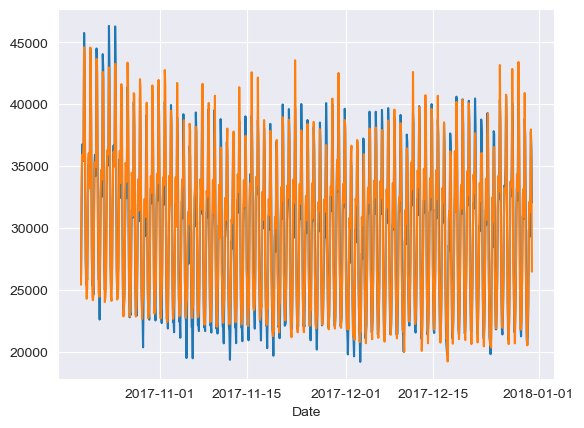

In [195]:

sns.lineplot(x=test_y.index, y=test_y.values)
sns.lineplot(x=test_y.index, y=pred_y)